### Import your librares

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Load your dataset

In [2]:
df= pd.read_csv('seattle_weather.csv')
df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [3]:
df.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [4]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [5]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


<AxesSubplot:>

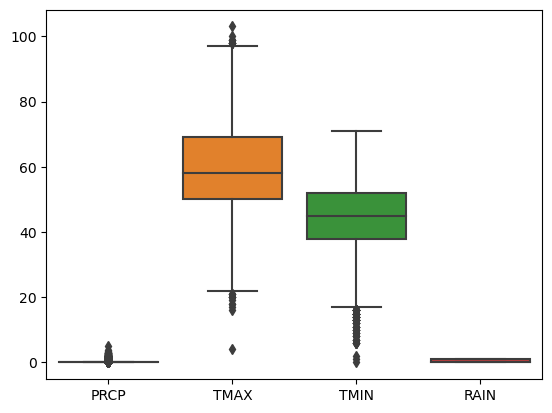

In [6]:
sns.boxplot(data=df)

In [7]:
Q1 = df['TMAX'].quantile(
       q=0.25,                      # The percentile to calculate
      interpolation='midpoint'      
)
Q1

50.0

In [8]:
Q3 = df['TMAX'].quantile(
       q=0.75,                      # The percentile to calculate
      interpolation='midpoint'      
)
Q3

69.0

In [9]:
IQR= Q3-Q1
IQR

19.0

In [10]:
Upper=Q3+(1.5*IQR)
Upper

97.5

In [11]:
lower=Q1-(1.5*IQR)
lower

21.5

In [12]:
df=df[df['TMAX'] > 21.50]
df=df[df['TMAX'] < 97.50]

<AxesSubplot:>

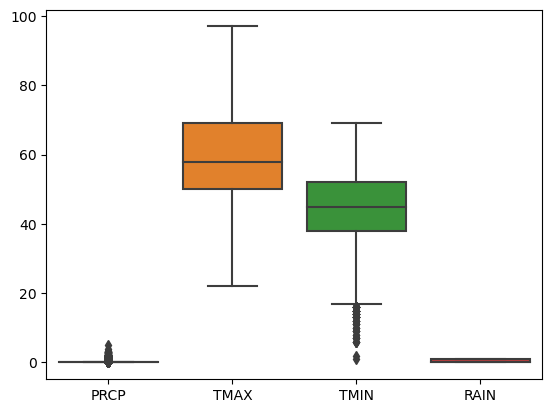

In [13]:
sns.boxplot(data=df)

## TMIN

In [19]:
Q1 = df['TMIN'].quantile(
       q=0.25,                      # The percentile to calculate
      interpolation='midpoint'      
)
Q1

38.0

In [20]:
Q3 = df['TMIN'].quantile(
       q=0.75,                      # The percentile to calculate
      interpolation='midpoint'      
)
Q3

52.0

In [21]:
IQR= Q3-Q1
IQR

14.0

In [22]:
Upper=Q3+(1.5*IQR)
Upper

73.0

In [23]:
lower=Q1-(1.5*IQR)
lower

17.0

In [24]:
df=df[df['TMIN'] > 17.0]
df=df[df['TMIN'] < 73.0]

<AxesSubplot:>

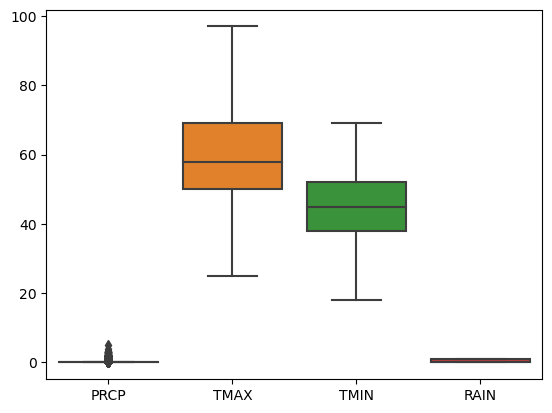

In [25]:
sns.boxplot(data=df)